# Exploratory Data Analysis on Slot Machine Data

## Objective: 
1. Perform an initial exploratory data analysis on slot machine data using R
2. Derive insights using some metrics used in gambling

We will be using the following packages in this exercise:
1. **dplyr** - convenient data manipulation
2. **data.table** - faster data manipulation (in case of technical difficulties using dplyr)
3. **lubridate** - used for easier date manipulation
4. **ggplot2**- package used to create visuals

In [1]:
library(dplyr)
library(data.table)
library(lubridate)
library(ggplot2)
options(scipen=999)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



## Dataset
The dataset consists of **842,765** rows which represents a single round (spin) done using the slot machine. There are **16** columns which provides further information on the spin i.e. event time, spin outcome (win type), slot machine used, among others

A preview of the dataset is seen below:

In [2]:
#read dataset
data <- read.csv('C:/Users/ADRIANO/Desktop/assessment/DataScientistTest/datascientist-test-data.csv',stringsAsFactors=F,na.strings=c(""," "))
head(data)

event_user,install_date,event_name,event_time,slotmachine_id,current_level,session_id,session_token,total_bet_amount,max_bet_amount,amount,spin_type,win_type
0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,2500,5000,750,manual,fake
0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,72000,manual,mega
0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,0,manual,none
0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:46:34.000000,Cleopatra,1,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,5000,1500,manual,fake
0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:47:34.000000,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,5000,12500,0,manual,none
0006eb6299ddd86c1f8f5d5c2c868a56,2019-02-01 22:44:22.000000,pcs.slotmachine.round_played,2019-02-01 22:47:34.000000,Cleopatra,2,5342ee7a3844e98b54fd074ea9aaabc1,ed3f346fd36ec57ecd781168a063fddb,12500,12500,4000,manual,fake


### Summary
There are **1,275** unique users from the span of February 1-5, 2019. Minimum amount that was bet into a single round is 400 while the maximum is 8,000,000,000.The maximum amount won in a single round 5,265,440,000,000.

This may be possible outliers.

A summary of the data is also provided below:

In [3]:
summary <- data.frame(Variable_Type=unlist(sapply(data,function(y) class(y))),
                            Unique_Values=sapply(data,function(y) n_distinct(y)),
                           Min_value=sapply(data,function(y) (min(y))),
                            Max_value=sapply(data,function(y) (max(y))),
                            Mean=sapply(data, function(y) (mean(y))))
summary

Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"Warning message in mean.default(y):
"argument is not numeric or logical: returning NA"

,Variable_Type,Unique_Values,Min_value,Max_value,Mean
event_user,character,1275,0006eb6299ddd86c1f8f5d5c2c868a56,ffd256da322ee33d0d9d34ff7416a4b0,NA
install_date,character,1266,2019-02-01 00:01:38.000000,2019-02-01 23:58:57.000000,NA
event_name,character,1,pcs.slotmachine.round_played,pcs.slotmachine.round_played,NA
event_time,character,157422,2019-02-01 00:02:38.000000,2019-02-05 23:59:55.000000,NA
slotmachine_id,character,49,AdventuresOfAlice,WorldFeast,NA
current_level,integer,382,1,1562,74.63636
session_id,character,5377,00094905733470a7173fb786002aa511,fffabe02663e89ff58b8ac6850b0f40c,NA
session_token,character,7837,000fcf52cf59d9c5a4fdd98fa62dc68a,fffef0929f2691ace3be48421dfaa5a5,NA
total_bet_amount,numeric,114,400,8000000000,183517297.03975
max_bet_amount,numeric,88,5000,8000000000,254751261.09888


We will be converting some of the columns as dates for manipulation

In [4]:
##Convert date and time
#install date to date
data$installdate <- as_date(ymd_hms(data$install_date))
data$eventdate <- as_date(ymd_hms(data$event_time))
data$eventtime <- as_datetime(data$event_time)

### Users
All 1,275 users have installed the application on February 1, 2019 (Day 0) and **98%** of these users started playing immediately while the other **2%** waited at least one day before the hitting the first spin.


In [5]:
#breakdown of users 
u <- data %>% group_by(event_user,eventdate) %>% arrange(eventdate) %>% group_by(event_user) %>% summarise(mindate=min(eventdate))
table(u$mindate)


2019-02-01 2019-02-02 2019-02-03 2019-02-04 2019-02-05 
      1251         15          5          1          3 

There is a **62% drop** of users that already played the game after installing. Out of the 491 users in Day 1, 15 are first time users of the application. The lowest day-to-day churn rate occured between Days 3 and 4 where only **21%** of the users churned.

Looking at the first 3 days after installation, we have **18%** overall user retention rate.

In [6]:
#Users played each day
use <- data %>% group_by(eventdate) %>% summarise(n=n_distinct(event_user))
use

eventdate,n
2019-02-01,1251
2019-02-02,491
2019-02-03,280
2019-02-04,232
2019-02-05,180


In [7]:
#Number of users installed on Day 0
installed <- data %>% group_by(installdate) %>% summarise(n=n_distinct(event_user))

#Number of users installed 3 days after
use <- data %>% group_by(eventdate) %>% summarise(n=n_distinct(event_user)) %>% filter(eventdate=='2019-02-04')

#Retention Rate

(use$n/installed$n)*100

[1] 18.19608

### Slot Machines

A user can play with more than one type of slot machine per session. In the 5-day period, **72%** of users used only one slot machine. On the average, a single user plays **2** slot machines in a single session.

In [8]:
#avg slot machines played by single user in each session
n_slots <- data %>% group_by(session_id) %>% summarise(nslots=n_distinct(slotmachine_id))

#users used one slot machine only
n_slots %>% filter(nslots==1) %>% summarise(n=n())

#avg slot machines played by single user in each session 
round(mean(n_slots$nslots))


n
3853


[1] 2

On the average, a single player spins **91** times on a slot machine in a single session. Manual is the most common spin type over the 5-day period. This might be because that doing a Manual spin feels more like a real life slot machine than Auto. A total of 4,425 re-spins and 152,768 free spins in the 5-day period.

In [9]:
#avg number of spins played for each machine session
n_spins <- data %>% group_by(session_id,session_token,slotmachine_id,eventdate) %>% 
  summarise(nspins=n())

round(mean(n_spins$nspins))

[1] 91

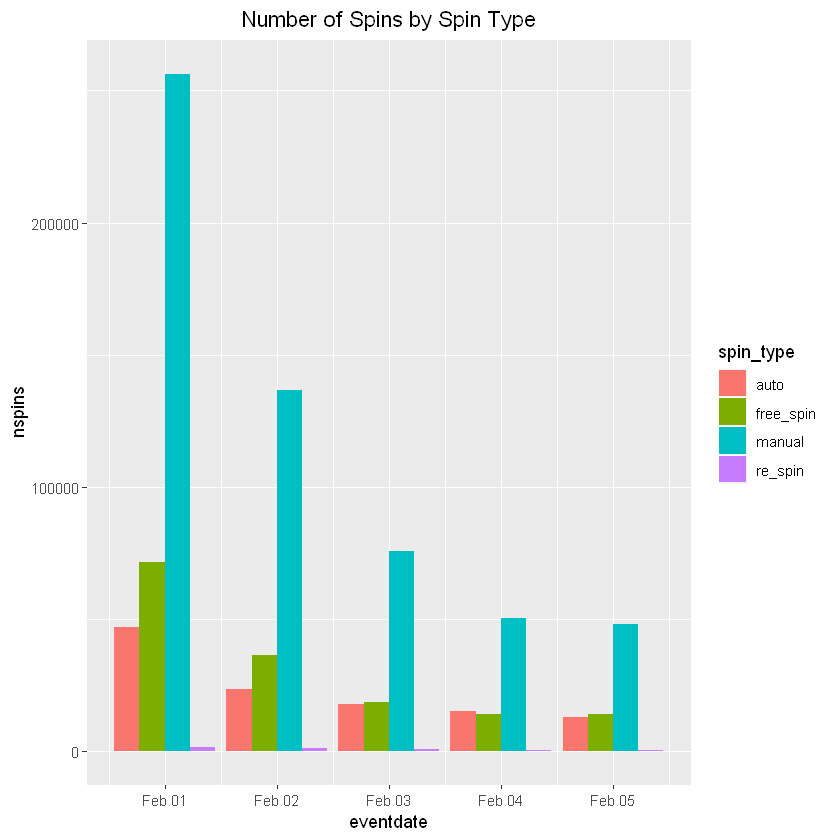

In [27]:
#Get number of spins per event and spin type
spintype <- data %>% group_by(eventdate,spin_type) %>% summarise(nspins=n())

#plot
ggplot(spintype, aes(fill=spin_type, y=nspins, x=eventdate)) + 
    geom_bar(position="dodge", stat="identity")+ggtitle("Number of Spins by Spin Type")+
theme(plot.title=element_text(hjust=0.5))

### Slot Machine Combinations
Users can play with more than one slot machine in a single session. Having 5 out of the top 10 slot machine pairs, **Cleopatra** is the most common slot machine that is partnered with other slot machines. **Cleopatra and GoldenDragon** slot machine pairing has been used for **354** sessions, the most in the group. 

Selecting by sessions


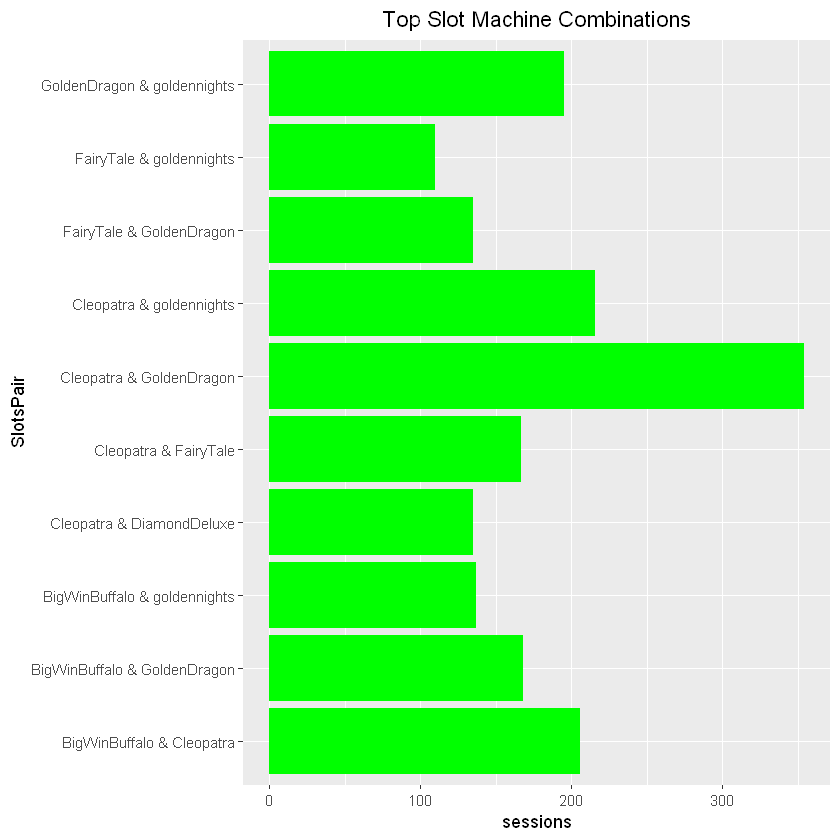

In [28]:
# Slot combinations

#get the session ids where more than 1 slot machine was used
slot <- n_slots %>% filter(nslots>1) %>% ungroup()
slots2 <- data %>% filter(session_id %in% slot$session_id) %>%arrange(slotmachine_id) %>%  group_by(session_id,slotmachine_id) %>% summarise() %>% mutate(slotn =row_number())

#Create unique key for each slot machine combination
slots2 <- left_join(slots2,slots2,by="session_id") %>% filter(slotmachine_id.x!=slotmachine_id.y & (slotn.x<slotn.y)) %>% mutate(SlotsPair=paste(slotmachine_id.x,slotmachine_id.y,sep=" & ")) %>% 
  select(session_id,SlotsPair) %>% unique()

#Get top combination of slot machines and its frequency
top_slots <- slots2 %>% group_by(SlotsPair) %>% summarise(sessions=n()) %>% arrange(desc(sessions)) %>% top_n(10)

#plot top combinations of slot machines
ggplot(top_slots, aes( y=sessions, x=SlotsPair))+ 
    geom_bar(position="dodge", stat="identity",fill='green')+coord_flip()+ggtitle("Top Slot Machine Combinations")+
theme(plot.title=element_text(hjust=0.5))

### Bets
On the average, a user changes his bet 3 times in a single session. It is also evident that when players changes their bets, they add to it but not decrease their bets. 

As expected we could also see that regular wins are most common side from 'none' and 'fake'. This tyoe of win is usually small but enought to keep players playing.

In [11]:
#bet size
bets <- data %>% group_by(session_id) %>% summarise(distinctbets=n_distinct(total_bet_amount))
round(mean(bets$distinctbets))

[1] 3

In [26]:
#Sort the values of the data to see unique total bets 
bets_delta <- data %>% group_by(session_id,total_bet_amount) %>% arrange(session_id,eventtime) %>% summarise() %>% ungroup() %>% 
  group_by(session_id) %>% mutate(row=row_number(),
                                  maxrow=ifelse(row==max(row),1,0)) 
#compare the amounts of bets that has been placed to see in each session
bets2 <- left_join(bets_delta,bets_delta,by="session_id") %>% filter(row.x>row.y) %>% mutate(diffrow=row.y-row.x) %>% 
  mutate(diff_amount=total_bet_amount.x-total_bet_amount.y) %>% filter(diffrow==-1)

delta <- left_join(bets_delta,bets2 %>% select(session_id,row=row.x,diff_amount),by=c('session_id','row'))

#check if there is at least one session that wherein a smaller bet was done before a big one
delta %>% filter(diff_amount<0)

#This means that the players adjust their bet upwards

session_id,total_bet_amount,row,maxrow,diff_amount


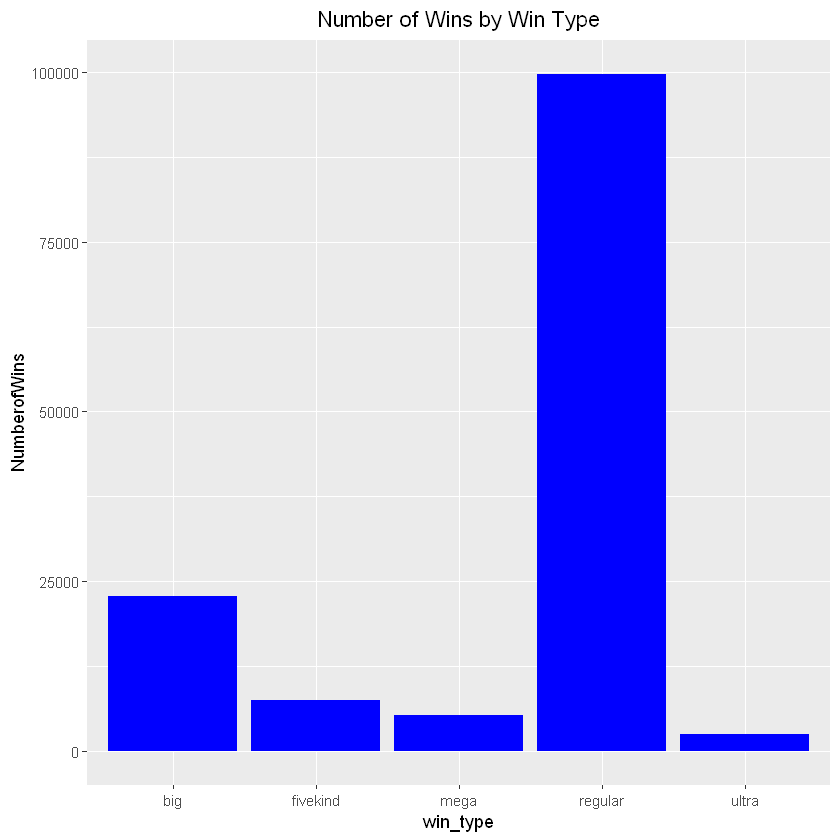

In [29]:
#Wins
Wins <- data %>% group_by(win_type) %>%filter(!win_type %in% c('none','fake') ) %>%  summarise(NumberofWins=n())

ggplot(Wins, aes( y=NumberofWins, x=win_type))+ 
    geom_bar(position="dodge", stat="identity",fill='blue')+ggtitle("Number of Wins by Win Type")+
theme(plot.title=element_text(hjust=0.5))


### Return to Player and Net Pay

**Return to Player (RTP)** or **Net Pay** indicates how much of the total amount on a slot machine will be paid back to players. The higher the RTP, the better payouts it could give. An RTP exceeding 100% indicates a loss for the game organizer/ casino.

RTP is calulated as:

> **Sum(Total Bettings) / Sum(Total Winnings)**


There are 11 slots that provides losses to the casinos:
  - CasinoClassicSevens
  - Easter
  - ClockworkChronicles
  - DoubleWinClassic
  - FarmCubes
  - MysticWolf
  - TheOutsiders
  - PotOfGold
  - ImmortalFortunes
  - StarshipSquadron
  - Cleopatra

Majority of slots that have more than 100% RTP are less likely to be played except Cleopatra. **Cleopatra** has been played in most sessions among all slot machines.It is still one of the machines that provides better payouts for players. **LuckyClassic777** provides the lowest RTP among the 42 slot machines in the application.

In [14]:
#calculate RTP
RTP <- data %>% group_by(session_token,slotmachine_id) %>% summarise(RTP=sum(amount)/sum(total_bet_amount)) %>%
  group_by(slotmachine_id) %>% summarise(avgRTP=mean(RTP)) 

sessions <- data %>% group_by(slotmachine_id) %>%  summarise(sessions=dplyr::n_distinct(session_token))

RTP <- left_join(RTP,sessions,by="slotmachine_id")
RTP %>% arrange(desc(avgRTP))

slotmachine_id,avgRTP,sessions
CasinoClassicSevens,368.7500000,1
Easter,25.9849407,8
ClockworkChronicles,25.2280359,3
DoubleWinClassic,8.6478081,3
FarmCubes,4.7960915,15
MysticWolf,2.4199752,149
TheOutsiders,2.2964416,26
PotOfGold,1.3743022,47
ImmortalFortunes,1.2743884,177
StarshipSquadron,1.1285749,10


Cleopatra is the most played slot machine in the application. Looking at the distribution of NetPay of Cleopatra for bets amounting to 5,000, we can see that majority of the NetPay is less than 10. This means that Cleopatra has been providing small wins to players. The small wins gets them hooked both to the machine and the application.

In [15]:
#Calculate NetPay per session
NetPay <- data %>% filter(slotmachine_id=='Cleopatra' & total_bet_amount==5000) %>% group_by(session_id,session_token) %>% 
  summarise(NetPay=sum(amount)/sum(total_bet_amount))


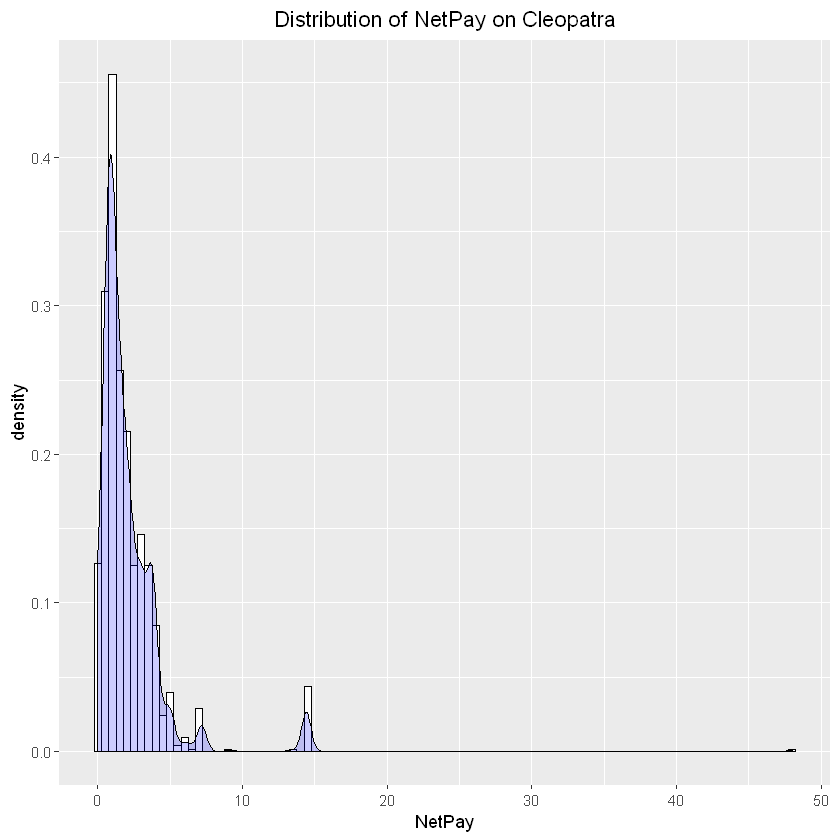

In [30]:
#Plot parameters
breaks <- pretty(range(NetPay$NetPay), n = nclass.FD(NetPay$NetPay), min.n = 1)
bwidth <- breaks[2]-breaks[1]

#Plot distribution of NetPay
ggplot(NetPay, aes(x=NetPay)) + 
 geom_histogram(aes(y=..density..), colour="black", fill="white",binwidth = bwidth)+
 geom_density(alpha=.2, fill="blue") +ggtitle("Distribution of NetPay on Cleopatra")+
theme(plot.title=element_text(hjust=0.5))